In [1]:
# LoganDowning-M03-DataModelFinal.py
# Mar 15, 2018
# Datasci 400

# Datasource is the "Hepatitis" dataset located at UCI Machine Learning Repo
# http://archive.ics.uci.edu/ml/datasets/Hepatitis

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,auc,f1_score,recall_score,precision_score

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the data provided. It is already standardized (M02 assignment)
df = pd.read_csv("LoganDowning-M02-Dataset.csv")
#df.head()

In [4]:
# Drop the last three columns, which were fabricated examples of 
# categorical binning and not real predictors.
df = df.iloc[:,:19]
df.head()

Survived  Age  Sex  Steroid  Antivirals  Fatigue  Malaise  Anorexia  \
0         1   29    1        0           1        1        1         1   
1         1   47    0        0           1        0        1         1   
2         1   74    0        1           1        0        1         1   
3         1   29    0        1           0        1        1         1   
4         1   38    0        1           1        1        1         1   

   Liver Big  Liver Firm  Spleen Palpable  Spiders  Ascites  Varices  \
0          0           1                1        1        1        1   
1          0           1                1        1        1        1   
2          1           1                1        1        1        1   
3          1           1                1        1        1        1   
4          1           1                1        1        1        1   

   Bilirubin  Alk Phosphate      SGOT   Albumin  Histology  
0  -0.359771  -4.379946e-01 -0.767347  0.296285          0  
1  -0.443925   6.394619e-01 -0.496096 -0.514416          0  
2  -0.612233  -2.009542e-01 -0.609117  0.296285          0  
3  -0.612233  -1.278411e+00 -0.383075  0.296285          0  
4  -0.359771  -3.062316e-16  1.289640  0.296285          0

In [5]:
# Divide out the features (columns: 2-19) from the target (column: 1)
X = df.iloc[:,1:]  # features
y = df['Survived'] # target classification

In [6]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.3, random_state=101 )

In [7]:
# Pick the best selectors using SelectKBest
from sklearn.feature_selection import SelectKBest
select = SelectKBest(k=9)
select.fit(X_train,y_train)
#select.pvalues_<.05
#print(select.scores_)
#select.get_support()
#select.transform(X)[1,:]
#X_train=select.transform(X_train)
#X_test=select.transform(X_test)

#print("Kept columns:")
#print(X.columns.values[ select.get_support() ])

#print("Reduced featureset:")
#pd.DataFrame(X_train,columns=X.columns.values[ select.get_support() ]).head()
#pd.DataFrame(X_test,columns=X.columns.values[ select.get_support() ])

# results from SelectKBest turn out to be:
best_features = ['Fatigue', 'Malaise', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices',
 'Bilirubin', 'Albumin', 'Histology']

print("- Best features (9 highest scores) using SelectKBest are:\n")
print( best_features )

print("\n- Reduced feature set:")

# reduce the X_train and X_test to these features
X_train = X_train.loc[ :,best_features ]
X_test  = X_test.loc[ :,best_features ]

X_train.head()

- Best features (9 highest scores) using SelectKBest are:

['Fatigue', 'Malaise', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'Albumin', 'Histology']

- Reduced feature set:


Fatigue  Malaise  Spleen Palpable  Spiders  Ascites  Varices  \
64        1        1                1        1        1        1   
98        0        1                0        0        1        1   
50        1        1                1        1        1        1   
21        0        0                0        0        1        1   
22        1        1                1        1        1        1   

       Bilirubin       Albumin  Histology  
64 -5.280789e-01  6.205658e-01          0  
98 -3.737177e-16 -7.200476e-16          1  
50 -4.439252e-01  2.962852e-01          0  
21 -1.914639e-01  4.584255e-01          0  
22 -3.597714e-01  2.962852e-01          0

In [8]:
# create a results accumulator to store results for each model. 
# will be used at the end to compare values.
results = pd.DataFrame(columns=['SVM','Naive Bayes'])

**Model 1: Support Vector Machine**

In [9]:
# Model 1 selection is: Support Vector Machine estimator
# Here are the parameters I will use:
C      = 100
gamma  = .01
kernel = 'linear'

In [10]:
# Fit the model with the data
model = SVC(C=C, gamma=gamma, kernel=kernel,probability=True,random_state=109)
model.fit(X_train,y_train)
model.get_params()

{'C': 100,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': 109,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
# Generate predictions
pred = model.predict(X_test)

In [12]:
# Examine outcomes using confusion matrix/classification report
print("Confusion matrix:")
print( confusion_matrix(y_test,pred))
print("\nClassification report:")
print( classification_report(y_test,pred))

Confusion matrix:
[[ 3  5]
 [ 6 33]]

Classification report:
             precision    recall  f1-score   support

          0       0.33      0.38      0.35         8
          1       0.87      0.85      0.86        39

avg / total       0.78      0.77      0.77        47



In [13]:
# compute a few interesting comparision metrics for later use:
results.loc['accuracy','SVM'] = np.round(accuracy_score(y_test,pred),2)
results.loc['recall (0)','SVM'] = np.round(recall_score(y_test,pred,pos_label=0),2)
results.loc['recall (1)','SVM'] = np.round(recall_score(y_test,pred,pos_label=1),2)
results.loc['precision (0)','SVM'] = np.round(precision_score(y_test,pred,pos_label=0),2)
results.loc['precision (1)','SVM'] = np.round(precision_score(y_test,pred,pos_label=1),2)
results.loc['F1 (0)','SVM'] = np.round(f1_score(y_test,pred,pos_label=0),2)
results.loc['F1 (1)','SVM'] = np.round(f1_score(y_test,pred,pos_label=1),2)

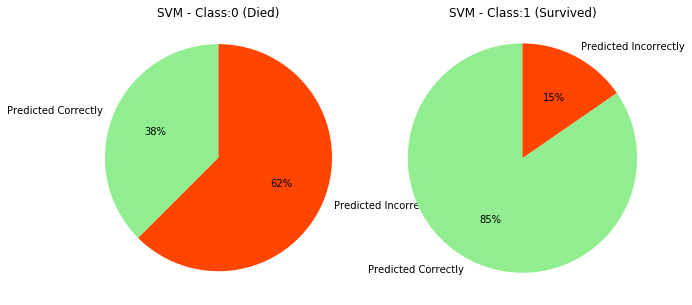

In [14]:
# Plot overall results (gross correct per class)
c = confusion_matrix(y_test, pred)
tn,fp,fn,tp = c.ravel()

labels = 'Predicted Correctly', 'Predicted Incorrectly'
colors = ['lightgreen','orangered']
sizes_0 = [tn,fp]
sizes_1 = [tp,fn]

fig, ax = plt.subplots(ncols=2)
ax[0].pie(sizes_0, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90, colors=colors)
ax[0].axis('equal')  
ax[0].set_title("SVM - Class:0 (Died)")

ax[1].pie(sizes_1, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90, colors=colors)
ax[1].axis('equal') 
ax[1].set_title("SVM - Class:1 (Survived)")
fig.set_size_inches(10,5)
plt.show()

In [15]:
# Examine ROC AUC and ROC curve
# Get the raw probabilities of class membership (class: 1)
y_prob=model.predict_proba(X_test)[:,1]
#y_prob

In [16]:
# Generate false positive & true positive rates using roc_curve() function
fpr, tpr, th = roc_curve(y_test, y_prob) # False Positive Rate, True Posisive Rate, probability thresholds
#print ("\nTP rates:", np.round(tpr, 2))
#print ("\nFP rates:", np.round(fpr, 2))
#print ("\nProbability thresholds:", np.round(th, 2))


AUC score (using auc(fpr,tpr) function): 0.74
AUC score (using roc_auc_score(y_test,y_prob) function): 0.74 



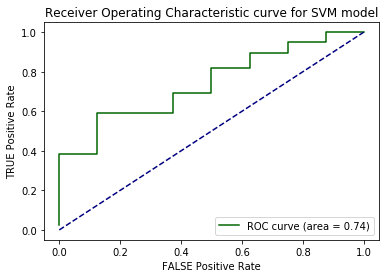

In [17]:
# Take a look at the ROC curve, and compute the AUC

print ("AUC score (using auc(fpr,tpr) function):", np.round(auc(fpr, tpr), 2))
print ("AUC score (using roc_auc_score(y_test,y_prob) function):", np.round(roc_auc_score(y_test, y_prob), 2), "\n")
results.loc['AUC','SVM'] = np.round(auc(fpr, tpr), 2)

# plot:
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color
plt.figure()
plt.title('Receiver Operating Characteristic curve for SVM model')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()


** Model 2: Naive Bayes (Gaussian) **

In [18]:
# Model 2 selection is: Naive Bayes (Gaussian)

In [19]:
# Create and fit the model with the data
model = GaussianNB()
model.fit(X_train,y_train)
model.get_params()

{'priors': None}

In [20]:
# Generate predictions
pred = model.predict(X_test)

In [21]:
# Examine outcomes using confusion matrix/classification report
print("Confusion matrix:")
print( confusion_matrix(y_test,pred))
print("\nClassification report:")
print( classification_report(y_test,pred))

Confusion matrix:
[[ 6  2]
 [20 19]]

Classification report:
             precision    recall  f1-score   support

          0       0.23      0.75      0.35         8
          1       0.90      0.49      0.63        39

avg / total       0.79      0.53      0.59        47



In [22]:
# compute a few interesting comparision metrics for later use:
tn,fp,fn,tp = confusion_matrix(y_test,pred).ravel()
results.loc['accuracy','Naive Bayes'] = np.round(accuracy_score(y_test,pred),2)
results.loc['recall (0)','Naive Bayes'] = np.round(recall_score(y_test,pred,pos_label=0),2)
results.loc['recall (1)','Naive Bayes'] = np.round(recall_score(y_test,pred,pos_label=1),2)
results.loc['precision (0)','Naive Bayes'] = np.round(precision_score(y_test,pred,pos_label=0),2)
results.loc['precision (1)','Naive Bayes'] = np.round(precision_score(y_test,pred,pos_label=1),2)
results.loc['F1 (0)','Naive Bayes'] = np.round(f1_score(y_test,pred,pos_label=0),2)
results.loc['F1 (1)','Naive Bayes'] = np.round(f1_score(y_test,pred,pos_label=1),2)

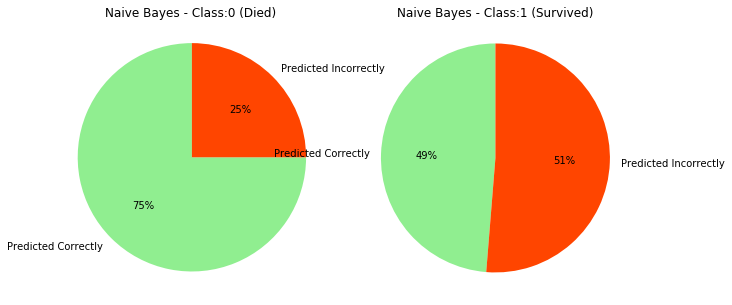

In [23]:
# Plot overall results (gross correct per class)
c = confusion_matrix(y_test, pred)
tn,fp,fn,tp = c.ravel()

labels = 'Predicted Correctly', 'Predicted Incorrectly'
colors = ['lightgreen','orangered']
sizes_0 = [tn,fp]
sizes_1 = [tp,fn]

fig, ax = plt.subplots(ncols=2)
ax[0].pie(sizes_0, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90, colors=colors)
ax[0].axis('equal')  
ax[0].set_title("Naive Bayes - Class:0 (Died)")

ax[1].pie(sizes_1, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90, colors=colors)
ax[1].axis('equal') 
ax[1].set_title("Naive Bayes - Class:1 (Survived)")
fig.set_size_inches(10,5)
plt.show()

AUC score (using auc(fpr,tpr) function): 0.72
AUC score (using roc_auc_score(y_test,y_prob) function): 0.72 



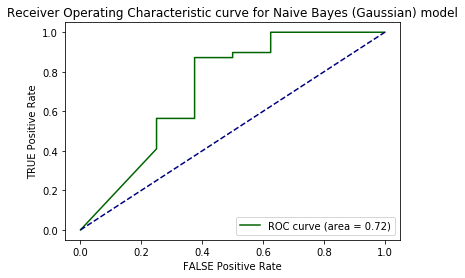

In [24]:
# Examine ROC AUC and ROC curve
# Get the raw probabilities of class membership (class: 1)
y_prob=model.predict_proba(X_test)[:,1]

# Compute AUC score:
fpr, tpr, th = roc_curve(y_test, y_prob) # False Positive Rate, True Positive Rate, probability thresholds
print ("AUC score (using auc(fpr,tpr) function):", np.round(auc(fpr, tpr), 2))
print ("AUC score (using roc_auc_score(y_test,y_prob) function):", np.round(roc_auc_score(y_test, y_prob), 2), "\n")
results.loc['AUC','Naive Bayes'] = np.round(auc(fpr, tpr), 2)

# plot the ROC curve:
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color
plt.figure()
plt.title('Receiver Operating Characteristic curve for Naive Bayes (Gaussian) model')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()


In [25]:
# compare results of the two models using the results dataframe
results

SVM Naive Bayes
accuracy       0.77        0.53
recall (0)     0.38        0.75
recall (1)     0.85        0.49
precision (0)  0.33        0.23
precision (1)  0.87         0.9
F1 (0)         0.35        0.35
F1 (1)         0.86        0.63
AUC            0.74        0.72

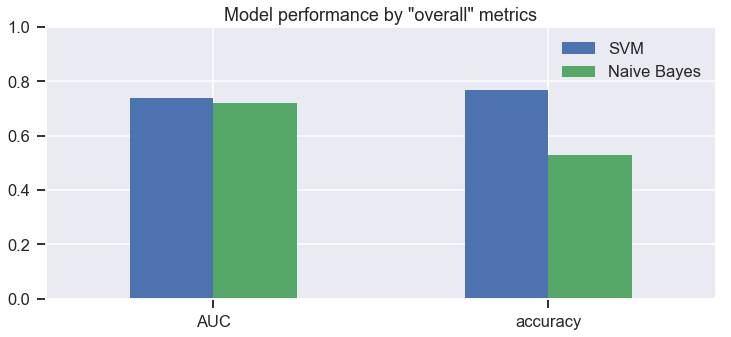

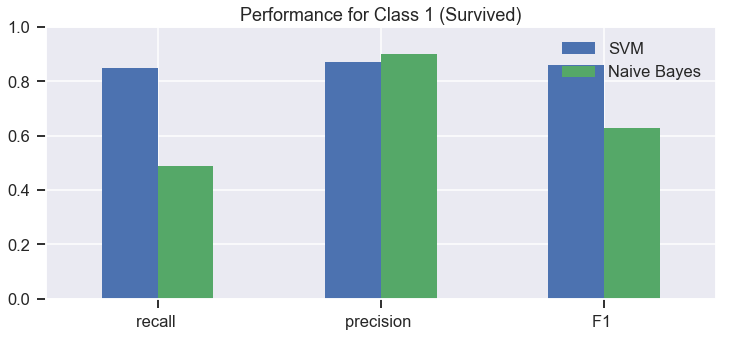

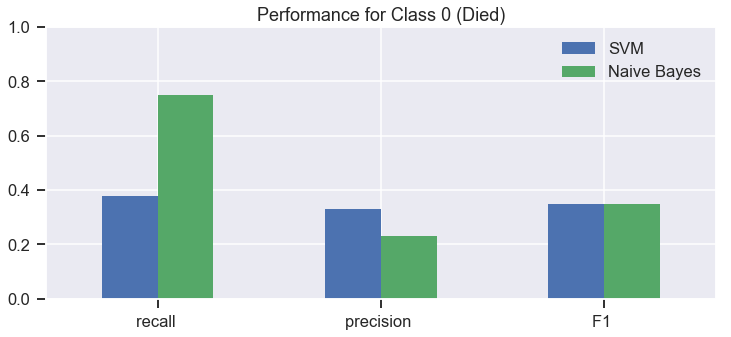

In [30]:
# plot the score comparisons across models
plt.style.use('seaborn')
sns.set_context('talk')

# overall (all outcomes):
ax = results.loc[['AUC','accuracy']].plot.bar(figsize=(12,5),ylim=(0,1))
ax.set_title("Model performance by \"overall\" metrics")
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

# class 1 (survived):
ax = results.loc[['recall (1)','precision (1)','F1 (1)']].plot.bar(figsize=(12,5),ylim=(0,1))
ax.set_title("Performance for Class 1 (Survived)")
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
labels = [item.get_text().replace("(1)","") for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)  
    
# class 0 (died):    
ax = results.loc[['recall (0)','precision (0)','F1 (0)']].plot.bar(figsize=(12,5),ylim=(0,1))
ax.set_title("Performance for Class 0 (Died)")
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
labels = [item.get_text().replace("(0)","") for item in ax.get_xticklabels()]
_=ax.set_xticklabels(labels) 
    

In [27]:
# Outcomes:
#
# - While overall (F1) scores make both models appear to be well-performing, a closer look
#   reveals differences between prediction powers, especially the negative outcome (Class 0, Died)
#
# - SVM is very good on picking out Class 1 (Survived) - its "recall" measure
#   for Class 1 consistently beats that of Naive Bayes.
#
# - Naive Bayes is much better at picking out Class 0 (Died) - its recall measure
#   for Class 0 consistently beats that of SVM.
#
# If I had to choose a model for production, I would take Naive Bayes:
#
#   - Naive Bayes has the better AUC score
#   - Naive Bayes has the better F1 score (both classes)
#   - predicting negative outcomes (Died) is more important than false negatives,
#     and Naive Bayes does that better than SVM.
#

In [28]:
##
## Summary
##
## 1. Selected two classification models (SVM and Naive Bayes).
##
## 2. Split data into testing and training data.
##
## 3. Reduced feature set using SelectKBest. Using 10 features with highest scores 
##    for modeling.
##
## 4. Fit models with training data. Created predictions using test data.
##
## 5. Created confusion matrix and ROC curve for each model. Calculated five  
##    evaluation metrics:
##      Accuracy, AUC (for each model)
##      Recall, Precision and F1 scores (for both classes)
##
## 6. Examined predictive power of each model. 
##      - Each model has strengths and weaknesses, esp. when looking at outcomes by class.
##      - Recommend selecting Naive Bayes for production, which does a better job
##        on picking out true negatives vs. SVM.
##

